In [56]:
print(__doc__)

Automatically created module for IPython interactive environment


In [57]:
import numpy as np
import wave as wv
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile
from sklearn.decomposition import FastICA

# Get samples from wav files

2619.18445716


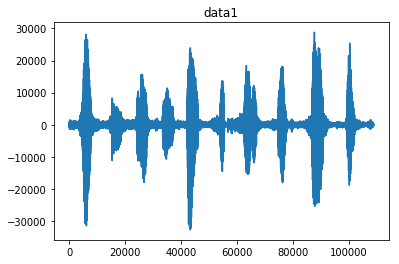

5564.16372545


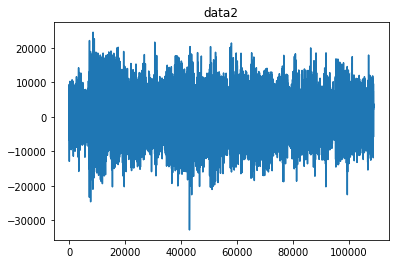

In [68]:
sourceFilesPrefix="ssm"
resultFilesPrefix="AudioResults\\ssm"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1-2.wav")
print(sample1_data.std(axis=0))
plt.figure(1)
plt.plot(sample1_data)
plt.title("data1")
plt.show()

rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2-2.wav")
print(sample2_data.std(axis=0))
plt.figure(2)
plt.plot(sample2_data)
plt.title("data2")
plt.show()

[424 646 433 ..., 238 225  81]
[-2896 -2354 -1967 ...,  3136  3623  2741]
108911
108911


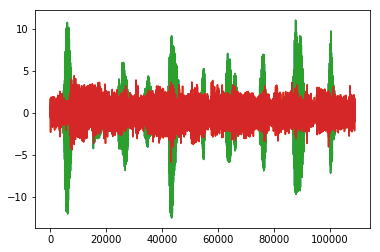

In [69]:
print(sample1_data)
print(sample2_data)
print(len(sample1_data))
print(len(sample2_data))
S1=np.c_[sample1_data,sample2_data]
S2=np.c_[sample1_data,sample2_data]
#print(S)
#median=S.std(axis=0)
#print(median)
#S= S/median

#S1/=S1.std(axis=0)
med1=S1.std(axis=0)
S1= S1/med1
#S2/=S2.std(axis=0)
med2=S2.std(axis=0)
S2=S2/med2

#print(S)
plt.figure()
plt.plot(S1)
plt.plot(S2)
plt.show()

In [70]:
#print(S)
mixingMatrix1=np.array([[2,5]])
mixingMatrix2=np.array([[0.5,3]])
X1=np.dot(S1,mixingMatrix1.T)
X2=np.dot(S2,mixingMatrix2.T)
X=np.c_[X1,X2]
ica = FastICA(n_components=2,whiten=True,max_iter=300)
S_=ica.fit_transform(X)
A_=ica.mixing_
M_=ica.mean_
print(X)
print(A_)
print(M_)

[[-2.27860281 -1.4804794 ]
 [-1.62203905 -1.14587259]
 [-1.43692395 -0.97787741]
 ..., 
 [ 2.9997695   1.73625411]
 [ 3.42746466  1.99634558]
 [ 2.52493484  1.49331294]]
[[ -649.68936224 -1654.07311431]
 [ -158.80624029  -991.0361236 ]]
[  1.08862113e-04  -9.49555390e-05]


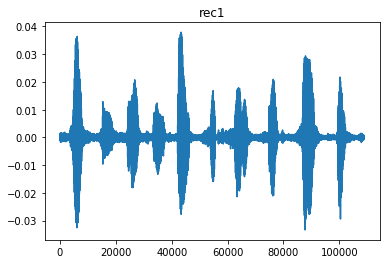

[ -4.99434090e-04  -7.54463494e-04  -5.06763065e-04 ...,  -2.64236037e-04
  -2.47580399e-04  -8.39162115e-05]


In [71]:
plt.figure(3)
plt.plot(S_.T[0])
plt.title("rec1")
plt.show()
print(S_.T[0])

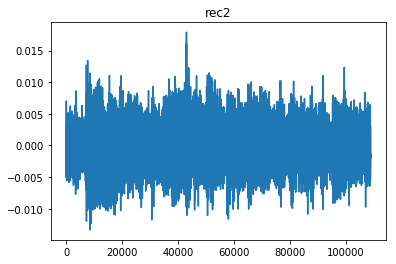

[ 0.00157381  0.00127704  0.00106783 ..., -0.00170971 -0.00197483
 -0.00149347]


In [72]:
plt.figure(4)
plt.plot(S_.T[1])
plt.title("rec2")
plt.show()
print(S_.T[1])

In [73]:
scipy.io.wavfile.write(resultFilesPrefix+"1.wav",16000,S_.T[0])

In [74]:
scipy.io.wavfile.write(resultFilesPrefix+"2.wav",16000,S_.T[1])